# Scikit-Learn Ml 기본동작
1) 데이터 수집 & 준비
2) 데이터 전처리
    - 데이터 / 타겟 분리
    - 데이터 표준화 / 정규화
    - 타겟(라벨) 인코딩
3) 학습을 위한 데이터 준비
    - 데이터셋
        - 학습용 데이터셋 => 학습에 사용
        - 검증용 데이터셋 => 모델 생성 중에 사용
        - 테스트용 데이터셋 => 모델 완성 후 사용
4) 학습 모델 생성
    - 학습 방법 선정 및 모델 객체 생성
    - 학습 진행
        - 모델 parameter 최적화 => 학습에 의해 결정되는 parameter
        - 최적의 모델 parameter를 찾기 위한 방법 => 최적화(optimizer)
        - 예) W 가중치, b 절편 등
    - 모델 평가
        - 성능 개선 => Hyper parameter(모델마다 다름) => 모델 튜닝
        - 예) knn => K, 학습횟수, 학습크기(배치 사이즈), 규제 값들
5) 모델 테스트
    - 학습에 사용되지 않은 데이터로 진행해야함(test data)
    - 새로운 데이터로 테스트 진행

In [60]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. 데이터 준비

In [43]:
x = [2, 4, 6, 8, 10]
y = [25, 44, 57, 79, 96]

# 2. 데이터 분포 분석 => EDA(시각화 분석)

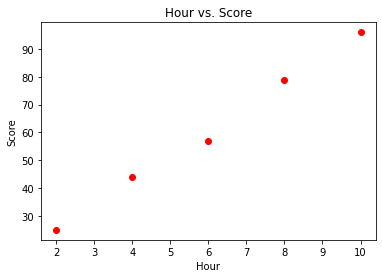

In [44]:
plt.title('Hour vs. Score')
plt.scatter(x, y, color='red')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

### 시간과 점수는 비례관계, 선형의 데이터 분포를 보인다.
### 독립변수 => Hour / 종속변수 => Score

# 3. 학습 방법 선택 및 모델 생성
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분포 => 선형 모델 적용

In [45]:
# 모델 객체 생성
model = LinearRegression()

In [46]:
# fit() => 2차원 형태의 데이터를 필요로 함
df = pd.DataFrame([x, y])
print(df.head())

# 혹은 2차원 배열로 정렬
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
for i in range(0, 5):
    print(f'{x[i]}{y[i]}')

    0   1   2   3   4
0   2   4   6   8  10
1  25  44  57  79  96
[2][25]
[4][44]
[6][57]
[8][79]
[10][96]


In [47]:
# 학습 => Training data
model.fit(x, y)

LinearRegression()

In [51]:
# 모델 parameter확인 => W가중치, b절편
print('W:', model.coef_, 'b:', model.intercept_)

W: [[8.85]] b: [7.1]


# 4. 모델 평가
- 테스트(검증) 데이터로 평가
- score()
    - 분류 : 정답, 예측답 => 맞춘 정도
        - 정확도(accuracy)
    - 회귀 : 정답, 예측답 => 사이의 거리(오차, Error)
        - 손실함수(loss/cost Function) : MSE, MAE, RMSE 낮을 수록 좋음
        - R squared 계수 : 0 ~ 1사이로 나온다, 높을 수록 좋음

In [61]:
# 점수 확인
print('score:', model.score(x, y))

score: 0.9955828142875301
MSE: 3433.4
MAE: 54.2
RMSE: 4.694860787026455
R squared: -428.175


In [62]:
# 오차 확인
preY = model.predict(x)

# 점수 확인
print('MSE:', mean_squared_error(x, preY))
print('MAE:', mean_absolute_error(x, preY))
print('RMSE:', mean_squared_log_error(x, preY))
print('R squared:', r2_score(x, preY))

MSE: 3430.6200000000003
MAE: 54.2
RMSE: 4.6889810377457275
R squared: -427.82750000000004
